In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# Load file and create data frame
file = "Resources/critic_reviews.csv"
critic_reviews_df = pd.read_csv(file, encoding="utf8")
critic_reviews_df.head()

,Series,Movie,Critic Review
0,Star Wars,STAR WARS: EPISODE IV - A NEW HOPE,It is the cinematic magic and the sense of joy...
1,Star Wars,STAR WARS: EPISODE IV - A NEW HOPE,A boy's adventure yarn in the most traditional...
2,Star Wars,STAR WARS: EPISODE IV - A NEW HOPE,"Oh, the astronomical audiences; oh, the mundan..."
3,Star Wars,STAR WARS: EPISODE IV - A NEW HOPE,"Star Wars is, indeed, a movie that dares to be..."
4,Star Wars,STAR WARS: EPISODE IV - A NEW HOPE,"It's a ""fun movie"", as they say. Meaning that ..."


In [3]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Loop through reviews to get sentiments

sentiments = []
compound_list = []
pos_list = []
neu_list = []
neg_list = []

reviews = critic_reviews_df["Critic Review"]

for review in reviews:
    compound = analyzer.polarity_scores(review)["compound"]
    positive = analyzer.polarity_scores(review)["pos"]
    neutral = analyzer.polarity_scores(review)["neu"]
    negative = analyzer.polarity_scores(review)["neg"]
    
    results = analyzer.polarity_scores(review)
    compound_list.append(results["compound"])
    pos_list.append(results["pos"])
    neg_list.append(results["neg"])
    neu_list.append(results["neu"])
    
    sentiments.append({"Compound": compound,
                      "Positive" : positive,
                      "Neutral": neutral,
                      "Negative": negative})
    
    

In [5]:
sentiment_df = pd.DataFrame(sentiments)
sentiment_df.head()

,Compound,Negative,Neutral,Positive
0,0.7778,0.129,0.500,0.371
1,0.6666,0.000,0.594,0.406
2,0.3612,0.059,0.844,0.097
3,-0.8920,0.198,0.802,0.000
4,0.9468,0.000,0.580,0.420


In [6]:
# Merge dataframes
critics_df = pd.concat([critic_reviews_df, sentiment_df], axis=1)
critics_df.head()

,Series,Movie,Critic Review,Compound,Negative,Neutral,Positive
0,Star Wars,STAR WARS: EPISODE IV - A NEW HOPE,It is the cinematic magic and the sense of joy...,0.7778,0.129,0.500,0.371
1,Star Wars,STAR WARS: EPISODE IV - A NEW HOPE,A boy's adventure yarn in the most traditional...,0.6666,0.000,0.594,0.406
2,Star Wars,STAR WARS: EPISODE IV - A NEW HOPE,"Oh, the astronomical audiences; oh, the mundan...",0.3612,0.059,0.844,0.097
3,Star Wars,STAR WARS: EPISODE IV - A NEW HOPE,"Star Wars is, indeed, a movie that dares to be...",-0.8920,0.198,0.802,0.000
4,Star Wars,STAR WARS: EPISODE IV - A NEW HOPE,"It's a ""fun movie"", as they say. Meaning that ...",0.9468,0.000,0.580,0.420


In [109]:
#Output 
critics_df.to_csv("Output/critic_reviews_with_sentiments.csv", encoding="utf8", index=False)

### Star Wars vs Star Trek: Critic Review

In [7]:
#Get the average compound score of each movie
movie_group = critics_df.groupby("Movie")
group_mean = movie_group["Compound"].mean()
pd.DataFrame(group_mean)

,Compound
Movie,
ROGUE ONE: A STAR WARS STORY,0.136729
STAR TREK,0.440570
STAR TREK - NEMESIS,0.182735
STAR TREK BEYOND,0.416846
STAR TREK GENERATIONS,0.145183
STAR TREK II: THE WRATH OF KHAN,0.404005
STAR TREK III - THE SEARCH FOR SPOCK,0.222100
STAR TREK INTO DARKNESS,0.351401
STAR TREK IV - THE VOYAGE HOME,0.448476


In [8]:
# To make life easier
sw4 = "STAR WARS: EPISODE IV - A NEW HOPE"
sw5 = "STAR WARS: EPISODE V - THE EMPIRE STRIKES BACK"
sw6 = "STAR WARS: EPISODE VI - RETURN OF THE JEDI"
sw1 = "STAR WARS: EPISODE I - THE PHANTOM MENACE"
sw2 = "STAR WARS: EPISODE II - ATTACK OF THE CLONES"
sw3 = "STAR WARS: EPISODE III - REVENGE OF THE SITH"
sw7 = "STAR WARS: EPISODE VII - THE FORCE AWAKENS"
sw8 = "STAR WARS: THE LAST JEDI"
r1 = "ROGUE ONE: A STAR WARS STORY"

st1 = "STAR TREK: THE MOTION PICTURE"
st2 = "STAR TREK II: THE WRATH OF KHAN"
st3 = "STAR TREK III - THE SEARCH FOR SPOCK"
st4 = "STAR TREK IV - THE VOYAGE HOME"
st5 = "STAR TREK V - THE FINAL FRONTIER"
st6 = "STAR TREK VI - THE UNDISCOVERED COUNTRY"

generations = "STAR TREK GENERATIONS"
contact = "STAR TREK: FIRST CONTACT"
insurrection = "STAR TREK: INSURRECTION"
nemesis = "STAR TREK - NEMESIS"

st09 = "STAR TREK"
darkness = "STAR TREK INTO DARKNESS"
beyond = "STAR TREK BEYOND"


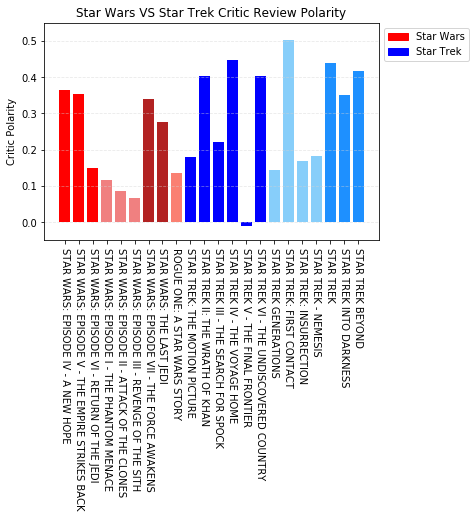

In [124]:
#Combine
sw_polarity = (group_mean[sw4], group_mean[sw5], group_mean[sw6], group_mean[sw1], group_mean[sw2],
              group_mean[sw3], group_mean[sw7], group_mean[sw8], group_mean[r1], group_mean[st1],
              group_mean[st2], group_mean[st3], group_mean[st4], group_mean[st5], group_mean[st6],
              group_mean[generations], group_mean[contact], group_mean[insurrection],
              group_mean[nemesis], group_mean[st09], group_mean[darkness], group_mean[beyond])

fig, ax = plt.subplots()
ind = np.arange(len(sw_polarity))
width = 0.75
rect1 = ax.bar(ind[0], sw_polarity[0], width, color="red")
rect2 = ax.bar(ind[1], sw_polarity[1], width, color="red")
rect3 = ax.bar(ind[2], sw_polarity[2], width, color="red")
rect4 = ax.bar(ind[3], sw_polarity[3], width, color='lightcoral')
rect5 = ax.bar(ind[4], sw_polarity[4], width, color='lightcoral')
rect6 = ax.bar(ind[5], sw_polarity[5], width, color='lightcoral')
rect7 = ax.bar(ind[6], sw_polarity[6], width, color='firebrick')
rect8 = ax.bar(ind[7], sw_polarity[7], width, color='firebrick')
rect9 = ax.bar(ind[8], sw_polarity[8], width, color='salmon')
rect10 = ax.bar(ind[9], sw_polarity[9], width, color="blue")
rect11 = ax.bar(ind[10], sw_polarity[10], width, color="blue")
rect12 = ax.bar(ind[11], sw_polarity[11], width, color="blue")
rect13 = ax.bar(ind[12], sw_polarity[12], width, color='blue')
rect14 = ax.bar(ind[13], sw_polarity[13], width, color='blue')
rect15 = ax.bar(ind[14], sw_polarity[14], width, color='blue')
rect16 = ax.bar(ind[15], sw_polarity[15], width, color='lightskyblue')
rect17 = ax.bar(ind[16], sw_polarity[16], width, color='lightskyblue')
rect18 = ax.bar(ind[17], sw_polarity[17], width, color='lightskyblue')
rect19 = ax.bar(ind[18], sw_polarity[18], width, color='lightskyblue')
rect20 = ax.bar(ind[19], sw_polarity[19], width, color='dodgerblue')
rect21 = ax.bar(ind[20], sw_polarity[20], width, color='dodgerblue')
rect22 = ax.bar(ind[21], sw_polarity[21], width, color='dodgerblue')

#Labels
plt.title("Star Wars VS Star Trek Critic Review Polarity")
plt.ylabel("Critic Polarity")
plt.ylim(-0.05,0.55)
labels = [sw4, sw5, sw6, sw1, sw2, sw3, sw7, sw8, r1,st1, st2, st3, st4, st5, st6, generations, contact, insurrection, nemesis, st09, darkness, beyond ]
plt.xticks(ind, labels, rotation=270)
redcolor = mpatches.Patch(color="red", label="Star Wars")
bluecolor = mpatches.Patch(color="blue", label="Star Trek")
plt.legend(handles=[redcolor, bluecolor], loc="best", bbox_to_anchor=(1,1))
ax.yaxis.grid(which="major", linestyle="--", color="lightgrey", alpha=0.5)
plt.savefig("Images/movie_critic_polarity.png", bbox_inches="tight")
plt.show()


### Comparing Sentiment Within Star Wars Movies

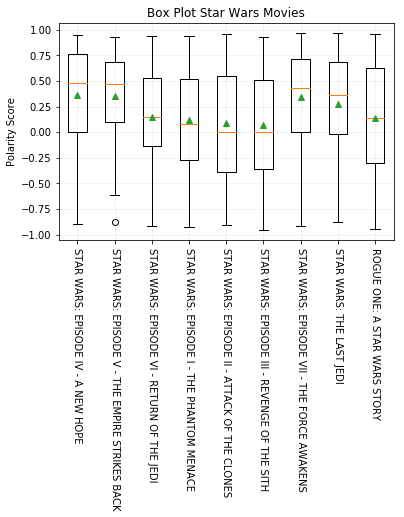

In [163]:
# box plot to compare star wars movies
sw4_compound = critics_df.Compound[critics_df["Movie"]==sw4].values
sw5_compound = critics_df.Compound[critics_df["Movie"]==sw5].values
sw6_compound = critics_df.Compound[critics_df["Movie"]==sw6].values
sw1_compound = critics_df.Compound[critics_df["Movie"]==sw1].values
sw2_compound = critics_df.Compound[critics_df["Movie"]==sw2].values
sw3_compound = critics_df.Compound[critics_df["Movie"]==sw3].values
sw7_compound = critics_df.Compound[critics_df["Movie"]==sw7].values
sw8_compound = critics_df.Compound[critics_df["Movie"]==sw8].values
r1_compound = critics_df.Compound[critics_df["Movie"]==r1].values

sw_compound = [sw4_compound, sw5_compound, sw6_compound, sw1_compound, sw2_compound, 
               sw3_compound, sw7_compound, sw8_compound, r1_compound]

fig1, ax = plt.subplots()
ax.boxplot(sw_compound, showmeans=True)

#Plot Labels
tick_labels = [sw4, sw5, sw6, sw1, sw2, sw3, sw7, sw8, r1]
ax.set_xticklabels(tick_labels, rotation=270)
plt.title("Box Plot Star Wars Movies")
plt.ylabel("Polarity Score")
plt.grid(True, color="lightgrey", alpha=0.5, linestyle="--")
plt.savefig("Images/Star_Wars_box.png", bbox_inches="tight")
plt.show()

### Comparing Sentiment Within Star Trek Movies

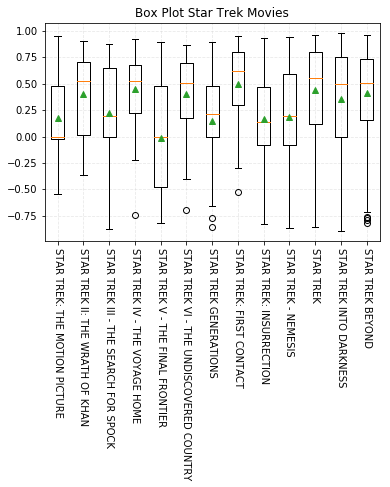

In [173]:
# box plot to compare star wars movies
st1_compound = critics_df.Compound[critics_df["Movie"]==st1].values
st2_compound = critics_df.Compound[critics_df["Movie"]==st2].values
st3_compound = critics_df.Compound[critics_df["Movie"]==st3].values
st4_compound = critics_df.Compound[critics_df["Movie"]==st4].values
st5_compound = critics_df.Compound[critics_df["Movie"]==st5].values
st6_compound = critics_df.Compound[critics_df["Movie"]==st6].values
generations_compound = critics_df.Compound[critics_df["Movie"]==generations].values
contact_compound = critics_df.Compound[critics_df["Movie"]==contact].values
insurrection_compound = critics_df.Compound[critics_df["Movie"]==insurrection].values
nemesis_compound = critics_df.Compound[critics_df["Movie"]==nemesis].values
st09_compound = critics_df.Compound[critics_df["Movie"]==st09].values
darkness_compound = critics_df.Compound[critics_df["Movie"]==darkness].values
beyond_compound = critics_df.Compound[critics_df["Movie"]==beyond].values

st_compound = [st1_compound, st2_compound, st3_compound, st4_compound, st5_compound, 
               st6_compound, generations_compound, contact_compound, insurrection_compound, 
               nemesis_compound, st09_compound, darkness_compound, beyond_compound]

fig2, ax = plt.subplots()
ax.boxplot(st_compound, showmeans=True)

#Plot Labels
tick_labels = [st1, st2, st3, st4, st5, st6, generations, contact, insurrection, nemesis,
              st09, darkness, beyond]
ax.set_xticklabels(tick_labels, rotation=270)
plt.title("Box Plot Star Trek Movies")
plt.grid(True, color="lightgrey", alpha=0.5, linestyle="--")
plt.savefig("Images/Star_Trek_box.png", bbox_inches="tight")
plt.show()



### Compare Sentiments Between Franchise

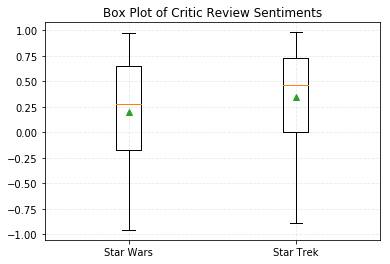

In [141]:
#Box plots to compare sentiments for series

starwars_critics = critics_df.Compound[critic_reviews_df["Series"]=="Star Wars"]
startrek_critics = critics_df.Compound[critic_reviews_df["Series"]=="Star Trek"]

starwars_critics = pd.DataFrame(starwars_critics)
startrek_critics = pd.DataFrame(startrek_critics)

starwars_compound = starwars_critics["Compound"].values
startrek_compound = startrek_critics["Compound"].values

data = [starwars_compound, startrek_compound]
fig, ax = plt.subplots()
ax.boxplot(data, showmeans=True)

#Plot Labels
tick_labels = ["Star Wars", "Star Trek"]
ax.set_xticklabels(tick_labels)
plt.title("Box Plot of Critic Review Sentiments")
plt.grid(True, color="lightgrey", alpha=0.5, linestyle="--")
plt.savefig("Images/box_plot.png")
plt.show()

### Compare Franchise Overall Critic Review

In [127]:
#Compare Series Overall
series_group = critics_df.groupby("Series")
series_mean = series_group["Compound"].mean()
series_mean

Series
Star Trek    0.348493
Star Wars    0.201552
Name: Compound, dtype: float64

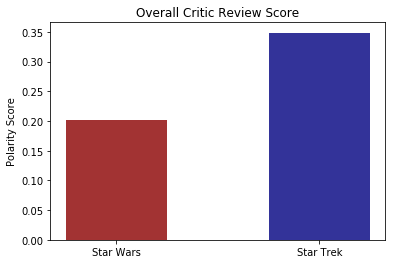

In [145]:
# Visualize it
plt.bar("Star Wars", series_mean["Star Wars"], color="darkred", alpha=0.8, width=0.5)
plt.bar("Star Trek", series_mean["Star Trek"], color="navy", alpha=0.8, width=0.5)

#Plot Labels
plt.title("Overall Critic Review Score")
plt.ylabel("Polarity Score")
plt.savefig("Images/overall_score.png")
plt.show()